In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Generalization

Consider two college students diligently preparing for their final exam. Commonly, this preparation will consist of practicing and testing their abilities by taking exams administered in previous years. Nonetheless, doing well on past exams is no guarantee that they will excel when it matters. 

For instance, imagine a student, **Elephantine Ellie**, whose preparation consisted entirely of memorizing the answers to previous years’ exam questions. Even if Ellie were endowed with an elephantine memory, and thus could perfectly recall the answer to any previously seen question, she might nevertheless freeze when faced with a new (previously unseen) question. 

By comparison, imagine another student, **Inductive Irene**, with comparably poor memorization skills, but a knack for picking up patterns. Note that if the exam truly consisted of recycled questions from a previous year, Ellie would handily outperform Irene. Even if Irene’s inferred patterns yielded 90% accurate predictions, they could never compete with Ellie’s 100% recall. However, even if the exam consisted entirely of fresh questions, Irene might maintain her 90% average.

As machine learning scientists, our goal is to discover patterns. But how can we be sure that we have truly discovered a general pattern and not simply memorized our data? Most of the time, our predictions are only useful if our model discovers such a pattern. We do not want to predict yesterday’s stock prices, but tomorrow’s. We do not need to recognize already diagnosed diseases for previously seen patients, but rather previously undiagnosed ailments in previously unseen patients. 

This problem—how to discover patterns that generalize—is the fundamental problem of machine learning, and arguably of all of statistics. We might cast this problem as just one slice of a far grander question that engulfs all of science: when are we ever justified in making the leap from particular observations to more general statements (*Popper, 2005*)?

##  Training Error and Generalization Error

In the standard supervised learning setting, we assume that the training data and the test data are drawn independently from identical distributions. This is commonly called the **IID assumption**. While this assumption is strong, it is worth noting that absent any such assumption we would be dead in the water. Why should we believe that training data sampled from distribution $P(X, Y)$ should tell us how to make predictions on test data generated by a different distribution $Q(X, Y)$? 

To begin with, we need to differentiate between the **training error** \(R_{emp}\), which is a statistic calculated on the training dataset, and the **generalization error** $R$, which is an expectation taken with respect to the underlying distribution. 

Formally, the training error is expressed as a sum:

$$
R_{emp} [X, y, f] = \frac{1}{n} \sum_{i=1}^{n} l(x^{(i)}, y^{(i)}, f (x^{(i)}))
$$

while the generalization error is expressed as an integral:

$$
R[p, f] = \mathbb{E}_{(x,y)\sim P} [l(x, y, f (x))] = \int \int l(x, y, f (x)) p(x, y) dx dy.
$$

Problematically, we can never calculate the generalization error $R$ exactly. Nobody ever tells us the precise form of the density function $p(x, y)$. Moreover, we cannot sample an infinite stream of data points. Thus, in practice, we must estimate the generalization error by applying our model to an **independent test set** $X', y'$ that was withheld from our training set. 

## Model Complexity

In classical theory, when we have simple models and abundant data, the training and generalization errors tend to be close. However, when we work with more complex models and/or fewer examples, we expect the training error to go down but the **generalization gap** to grow.

Imagine a model class so expressive that for any dataset of $n$ examples, we can find a set of parameters that can perfectly fit arbitrary labels, even if randomly assigned. In this case, even if we fit our training data perfectly, how can we conclude anything about the generalization error? For all we know, our generalization error might be no better than random guessing.

On the other hand, if our model class was not capable of fitting arbitrary labels, then it must have discovered a pattern. **Learning-theoretic ideas** about model complexity derive some inspiration from the ideas of Karl Popper, who formalized the criterion of **falsifiability**.

In short, what we want is a hypothesis that could not explain any observations we might conceivably make and yet nevertheless happens to be compatible with those observations that we in fact make.

Now what precisely constitutes an appropriate notion of model complexity is a complex matter. Often, models with more parameters are able to fit a greater number of arbitrarily assigned labels. However, this is not necessarily true. For instance, **kernel methods** operate in spaces with infinite numbers of parameters, yet their complexity is controlled by other means (*Scholkopf and Smola, 2002*).

One notion of complexity that often proves useful is the range of values that the parameters can take. Here, a model whose parameters are permitted to take arbitrary values would be more complex. We will revisit this idea in the next section, when we introduce **weight decay**, your first practical regularization technique.

At this point, we must stress another important point: when a model is capable of fitting arbitrary labels, low training error does not necessarily imply low generalization error. However, it does not necessarily imply high generalization error either! All we can say confidently is that **low training error alone is not enough to certify low generalization error**. 

Deep neural networks turn out to be just such models: while they generalize well in practice, they are too powerful to allow us to conclude much on the basis of training error alone. In these cases, we must rely more heavily on our **holdout data** to certify generalization after the fact. 

Error on the holdout data, i.e., **validation set**, is called the **validation error**.


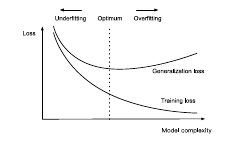

## Underfitting or Overfitting?

When we compare the training and validation errors, we want to be mindful of two common situations. First, we want to watch out for cases when our training error and validation error are both substantial but there is a little gap between them. If the model is unable to reduce the training error, that could mean that our model is too simple (i.e., insufficiently expressive) to capture the pattern that we are trying to model. Moreover, since the generalization gap $ R_{emp} - R $ between our training and generalization errors is small, we have reason to believe that we could get away with a more complex model. This phenomenon is known as **underfitting**.

On the other hand, as we discussed above, we want to watch out for the cases when our training error is significantly lower than our validation error, indicating severe **overfitting**. Note that overfitting is not always a bad thing. In deep learning especially, the best predictive models often perform far better on training data than on holdout data. Ultimately, we usually care about driving the generalization error lower, and only care about the gap insofar as it becomes an obstacle to that end. Note that if the training error is zero, then the generalization gap is precisely equal to the generalization error, and we can make progress only by reducing the gap.

### Polynomial Curve Fitting


$$
\hat{y} = \sum_{i=0}^{d} w_i x^i
$$

This is just a linear regression problem where our features are given by the powers of $x$, the model’s weights are given by $w_i$, and the bias is given by $w_0$ since $x^0 = 1$ for all $x$. Since this is just a linear regression problem, we can use the squared error as our loss function.

A higher-order polynomial function is more complex than a lower-order polynomial function, since the higher-order polynomial has more parameters and the model function’s selection range is wider. Fixing the training dataset, higher-order polynomial functions should always achieve lower (at worst, equal) training error relative to lower-degree polynomials. In fact, whenever each data example has a distinct value of $x$, a polynomial function with degree equal to the number of data examples can fit the training set perfectly.

We visualize the relationship between polynomial degree (model complexity) and underfitting vs. overfitting in Fig.1.

### Influence of Model Complexity on Underfitting and Overfitting

#### Dataset Size

As the above bound already indicates, another big consideration to bear in mind is dataset size. Fixing our model, the fewer samples we have in the training dataset, the more likely (and more severely) we are to encounter overfitting. As we increase the amount of training data, the generalization error typically decreases. Moreover, in general, more data never hurts. For a fixed task and data distribution, model complexity should not increase more rapidly than the amount of data. Given more data, we might attempt to fit a more complex model. Absent sufficient data, simpler models may be more difficult to beat.

For many tasks, deep learning only outperforms linear models when many thousands of training examples are available. In part, the current success of deep learning owes considerably to the abundance of massive datasets arising from Internet companies, cheap storage, connected devices, and the broad digitization of the economy.

###  Model Selection

Typically, we select our final model only after evaluating multiple models that differ in various ways (different architectures, training objectives, selected features, data preprocessing, learning rates, etc.). Choosing among many models is aptly called **model selection**.

In principle, we should not touch our test set until after we have chosen all our hyperparameters. Were we to use the test data in the model selection process, there is a risk that we might overfit the test data. Then we would be in serious trouble. If we overfit our training data, there is always the evaluation on test data to keep us honest. But if we overfit the test data, how would we ever know? See Ong et al. (2005) for an example of how this can lead to absurd results even for models where the complexity can be tightly controlled.

Thus, we should never rely on the test data for model selection. And yet we cannot rely solely on the training data for model selection either because we cannot estimate the generalization error on the very data that we use to train the model. In practical applications, the picture gets muddier. While ideally, we would only touch the test set once, real-world constraints often complicate things.


## 3.6.2 Underfitting or Overfitting?

When we compare the training and validation errors, we want to be mindful of two common situations. First, we want to watch out for cases when our training error and validation error are both substantial but there is little gap between them. If the model is unable to reduce the training error, that could mean that our model is too simple (i.e., insufficiently expressive) to capture the pattern that we are trying to model. Moreover, since the generalization gap \( R_{emp} - R \) between our training and generalization errors is small, we have reason to believe that we could get away with a more complex model. This phenomenon is known as *underfitting*.

On the other hand, we want to watch out for cases when our training error is significantly lower than our validation error, indicating severe *overfitting*. Note that overfitting is not always a bad thing. In deep learning especially, the best predictive models often perform far better on training data than on holdout data. Ultimately, we usually care about driving the generalization error lower, and only care about the gap insofar as it becomes an obstacle to that end. Note that if the training error is zero, then the generalization gap is precisely equal to the generalization error, and we can make progress only by reducing the gap.

### Polynomial Curve Fitting

To illustrate some classical intuition about overfitting and model complexity, consider the following: given training data consisting of a single feature \( x \) and a corresponding real-valued label \( y \), we try to find the polynomial of degree \( d \)

\[ \hat{y} = \sum_{i=0}^{d} w_i x^i \]  

to estimate the label \( y \). This is just a linear regression problem where our features are given by the powers of \( x \), the model’s weights are given by \( w_i \), and the bias is given by \( w_0 \) since \( x^0 = 1 \) for all \( x \). Since this is just a linear regression problem, we can use the squared error as our loss function.

A higher-order polynomial function is more complex than a lower-order polynomial function, since the higher-order polynomial has more parameters and the model function’s selection range is wider. Fixing the training dataset, higher-order polynomial functions should always achieve lower (at worst, equal) training error relative to lower-degree polynomials. In fact, whenever each data example has a distinct value of \( x \), a polynomial function with degree equal to the number of data examples can fit the training set perfectly.

### Influence of Model Complexity on Underfitting and Overfitting

### Dataset Size

Another big consideration to bear in mind is dataset size. Fixing our model, the fewer samples we have in the training dataset, the more likely (and more severely) we are to encounter overfitting. As we increase the amount of training data, the generalization error typically decreases. Moreover, in general, more data never hurts. For a fixed task and data distribution, model complexity should not increase more rapidly than the amount of data. Given more data, we might attempt to fit a more complex model. Absent sufficient data, simpler models may be more difficult to beat. For many tasks, deep learning only outperforms linear models when many thousands of training examples are available. In part, the current success of deep learning owes considerably to the abundance of massive datasets arising from Internet companies, cheap storage, connected devices, and the broad digitization of the economy.

## 3.6.3 Model Selection

Typically, we select our final model only after evaluating multiple models that differ in various ways (different architectures, training objectives, selected features, data preprocessing, learning rates, etc.). Choosing among many models is aptly called *model selection*. In principle, we should not touch our test set until after we have chosen all our hyperparameters. Were we to use the test data in the model selection process, there is a risk that we might overfit the test data. Then we would be in serious trouble. If we overfit our training data, there is always the evaluation on test data to keep us honest. But if we overfit the test data, how would we ever know? See Ong et al. (2005) for an example of how this can lead to absurd results even for models where the complexity can be tightly controlled.

Thus, we should never rely on the test data for model selection. And yet we cannot rely solely on the training data for model selection either because we cannot estimate the generalization error on the very data that we use to train the model.

In practical applications, the picture gets muddier. While ideally, we would only touch the test data once, to assess the very best model or to compare a small number of models with each other, real-world test data is seldom discarded after just one use. We can seldom afford a new test set for each round of experiments. In fact, recycling benchmark data for decades can have a significant impact on the development of algorithms, e.g., for image classification and optical character recognition.

The common practice to address the problem of training on the test set is to split our data three ways, incorporating a *validation set* in addition to the training and test datasets. The result is a murky practice where the boundaries between validation and test data are worryingly ambiguous. Unless explicitly stated otherwise, in the experiments in this book we are really working with what should rightly be called training data and validation data, with no true test sets. Therefore, the accuracy reported in each experiment of the book is really the validation accuracy and not a true test set accuracy.

## Cross-Validation

When training data is scarce, we might not even be able to afford to hold out enough data to constitute a proper validation set. One popular solution to this problem is to employ *K-fold cross-validation*. Here, the original training data is split into $ K $ non-overlapping subsets. Then model training and validation are executed $ K $ times, each time training on $ K - 1 $ subsets and validating on a different subset (the one not used for training in that round). Finally, the training and validation errors are estimated by averaging over the results from the $ K $ experiments.



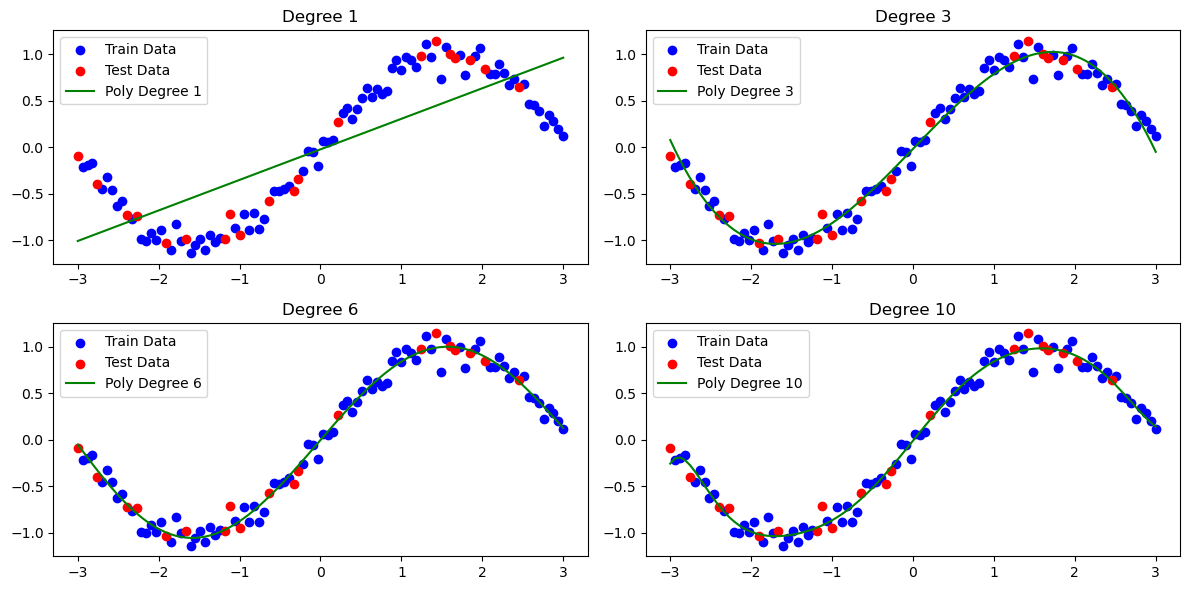

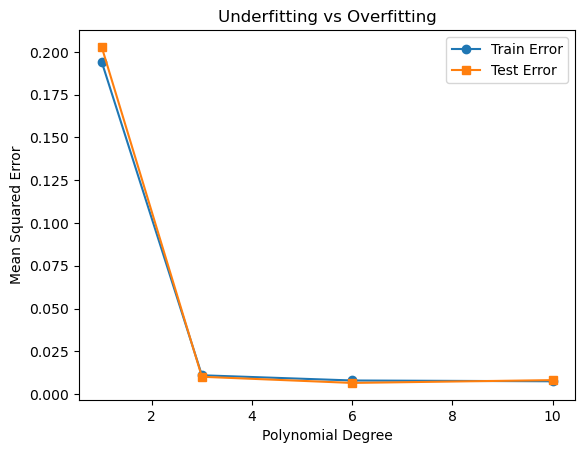

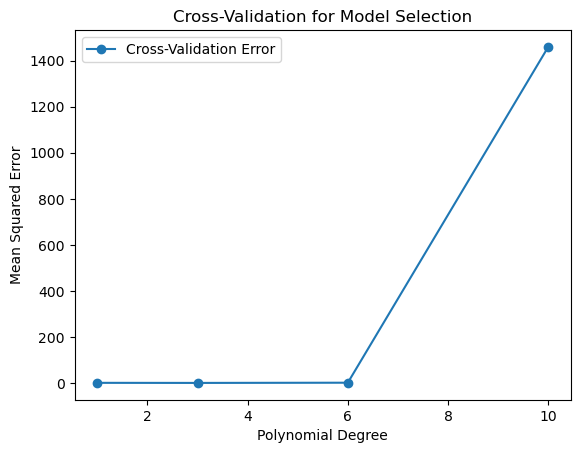

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# Generate synthetic dataset
np.random.seed(42)
x = np.linspace(-3, 3, 100).reshape(-1, 1)
y = np.sin(x) + 0.1 * np.random.randn(100, 1)

# Split dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Function to fit polynomial regression model
def polynomial_regression(degree):
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)
    x_test_poly = poly_features.transform(x_test)
    
    model = LinearRegression()
    model.fit(x_train_poly, y_train)
    
    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    return model, poly_features, train_error, test_error

# Evaluate models of different complexities
degrees = [1, 3, 6, 10]
train_errors = []
test_errors = []

plt.figure(figsize=(12, 6))
for i, degree in enumerate(degrees):
    model, poly_features, train_error, test_error = polynomial_regression(degree)
    train_errors.append(train_error)
    test_errors.append(test_error)
    
    x_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
    x_plot_poly = poly_features.transform(x_plot)
    y_plot = model.predict(x_plot_poly)
    
    plt.subplot(2, 2, i+1)
    plt.scatter(x_train, y_train, color='blue', label='Train Data')
    plt.scatter(x_test, y_test, color='red', label='Test Data')
    plt.plot(x_plot, y_plot, color='green', label=f'Poly Degree {degree}')
    plt.legend()
    plt.title(f'Degree {degree}')

plt.tight_layout()
plt.show()

# Plot training vs test error
degrees = np.array(degrees)
plt.plot(degrees, train_errors, marker='o', label='Train Error')
plt.plot(degrees, test_errors, marker='s', label='Test Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Underfitting vs Overfitting')
plt.show()

# Cross-validation
def cross_validation(degree, k=5):
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x)
    model = LinearRegression()
    scores = cross_val_score(model, x_poly, y, cv=k, scoring='neg_mean_squared_error')
    return -scores.mean()

cv_errors = [cross_validation(d) for d in degrees]
plt.plot(degrees, cv_errors, marker='o', label='Cross-Validation Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Cross-Validation for Model Selection')
plt.show()


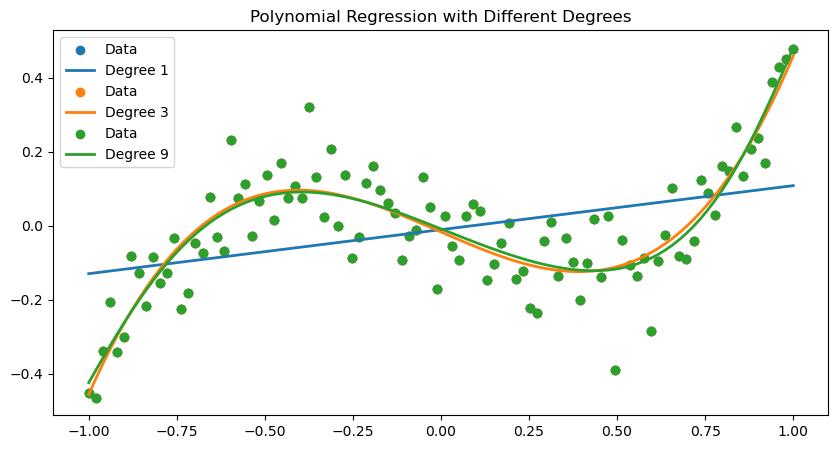

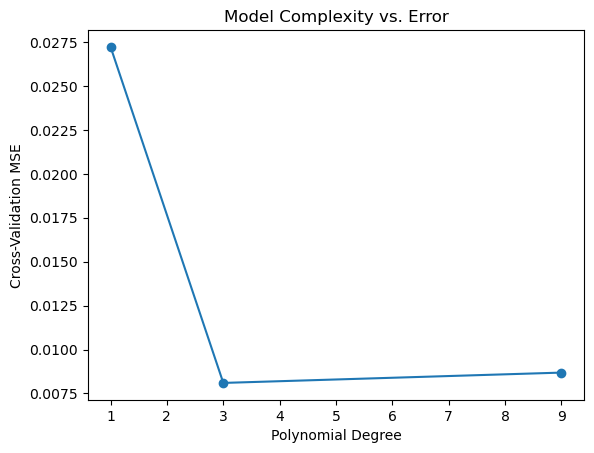

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Generate synthetic data
def generate_data(n_samples=100, noise=0.1):
    np.random.seed(42)
    x = np.linspace(-1, 1, n_samples)
    y = x**3 - 0.5 * x + noise * np.random.randn(n_samples)
    x, y = torch.tensor(x, dtype=torch.float32).unsqueeze(1), torch.tensor(y, dtype=torch.float32).unsqueeze(1)
    return x, y

# Define polynomial regression model
class PolynomialRegression(nn.Module):
    def __init__(self, degree):
        super().__init__()
        self.poly = nn.Linear(degree + 1, 1, bias=False)
    
    def forward(self, x):
        poly_features = torch.cat([x**i for i in range(self.poly.in_features)], dim=1)
        return self.poly(poly_features)

# Train model
def train_model(x_train, y_train, degree, epochs=1000, lr=0.01):
    model = PolynomialRegression(degree)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
    
    return model

# Cross-validation
def cross_validate(x, y, degree, k=5):
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    errors = []
    
    for train_idx, val_idx in kfold.split(x):
        x_train, x_val = x[train_idx], x[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        model = train_model(x_train, y_train, degree)
        y_val_pred = model(x_val)
        error = nn.MSELoss()(y_val_pred, y_val).item()
        errors.append(error)
    
    return np.mean(errors)

# Main execution
x, y = generate_data()

# Train models with different degrees and evaluate
degrees = [1, 3, 9]
errors = []
plt.figure(figsize=(10, 5))
for degree in degrees:
    model = train_model(x, y, degree)
    y_pred = model(x).detach()
    
    plt.scatter(x, y, label='Data')
    plt.plot(x, y_pred, label=f'Degree {degree}', linewidth=2)
    errors.append(cross_validate(x, y, degree))

plt.legend()
plt.title("Polynomial Regression with Different Degrees")
plt.show()

# Plot cross-validation errors
plt.figure()
plt.plot(degrees, errors, marker='o')
plt.xlabel("Polynomial Degree")
plt.ylabel("Cross-Validation MSE")
plt.title("Model Complexity vs. Error")
plt.show()


In [3]:
import random

def generate_data(n, degree, noise=0.1):
    """Generate synthetic polynomial data."""
    data = []
    for _ in range(n):
        x = random.uniform(-1, 1)
        y = sum(random.uniform(-1, 1) * (x ** i) for i in range(degree + 1))
        y += random.uniform(-noise, noise)  # Adding some noise
        data.append((x, y))
    return data

def polynomial_features(x, degree):
    """Compute polynomial features for input x."""
    return [x ** i for i in range(degree + 1)]

def train_test_split(data, test_ratio=0.2):
    """Split data into training and test sets."""
    random.shuffle(data)
    split = int(len(data) * (1 - test_ratio))
    return data[:split], data[split:]

def fit_polynomial_regression(train_data, degree):
    """Fit polynomial regression using basic least squares."""
    X, Y = [], []
    for x, y in train_data:
        X.append(polynomial_features(x, degree))
        Y.append(y)
    
    # Solve for coefficients (w) using normal equation w = (X^T X)^(-1) X^T Y
    XT = list(zip(*X))  # Transpose X
    XTX = [[sum(a * b for a, b in zip(row, col)) for col in XT] for row in XT]
    XTY = [sum(a * b for a, b in zip(row, Y)) for row in XT]
    
    # Solve the system XTX * W = XTY (using naive Gaussian elimination)
    w = gaussian_elimination(XTX, XTY)
    return w

def gaussian_elimination(A, b):
    """Solve Ax = b using Gaussian elimination."""
    n = len(A)
    for i in range(n):
        # Make the diagonal 1
        factor = A[i][i]
        for j in range(n):
            A[i][j] /= factor
        b[i] /= factor
        
        # Eliminate other rows
        for k in range(n):
            if k != i:
                factor = A[k][i]
                for j in range(n):
                    A[k][j] -= factor * A[i][j]
                b[k] -= factor * b[i]
    return b

def predict(x, weights):
    """Make predictions using learned polynomial regression model."""
    return sum(w * (x ** i) for i, w in enumerate(weights))

def mean_squared_error(data, weights):
    """Compute mean squared error on given dataset."""
    return sum((y - predict(x, weights)) ** 2 for x, y in data) / len(data)

def k_fold_cross_validation(data, k, degree):
    """Perform K-fold cross-validation."""
    random.shuffle(data)
    fold_size = len(data) // k
    errors = []
    
    for i in range(k):
        val_data = data[i * fold_size:(i + 1) * fold_size]
        train_data = data[:i * fold_size] + data[(i + 1) * fold_size:]
        
        weights = fit_polynomial_regression(train_data, degree)
        error = mean_squared_error(val_data, weights)
        errors.append(error)
    
    return sum(errors) / k

# Example usage:
data = generate_data(100, degree=3)
train_data, test_data = train_test_split(data)

# Fit model
degree = 3
weights = fit_polynomial_regression(train_data, degree)

# Evaluate model
test_error = mean_squared_error(test_data, weights)
print("Test Error:", test_error)

# Perform cross-validation
cv_error = k_fold_cross_validation(data, k=5, degree=3)
print("Cross-validation Error:", cv_error)


Test Error: 0.47711312011814744
Cross-validation Error: 0.6567899117423397


## Weight Decay

Now that we have characterized the problem of overfitting, we can introduce our first regularization technique. Recall that we can always mitigate overfitting by collecting more training data. However, that can be costly, time-consuming, or entirely out of our control, making it impossible in the short run. For now, we can assume that we already have as much high-quality data as our resources permit and focus on the tools at our disposal even when the dataset is taken as a given.

Recall that in our polynomial regression example (Section 3.6.2) we could limit our model’s capacity by tweaking the degree of the fitted polynomial. Indeed, limiting the number of features is a popular technique to mitigate overfitting. However, simply tossing aside features can be too blunt an instrument. Sticking with the polynomial regression example, consider what might happen with high-dimensional input.

The natural extensions of polynomials to multivariate data are called monomials, which are simply products of powers of variables. The degree of a monomial is the sum of the powers. For example, $x_1^2 x_2$ and $x_3 x_5^2$ are both monomials of degree 3. Note that the number of terms with degree $d$ blows up rapidly as $d$ grows larger. Given $k$ variables, the number of monomials of degree $d$ (i.e., $k$ multichoose $d$) is $\binom{k + d - 1}{d}$. Even small changes in degree, say from 2 to 3, dramatically increase the complexity of our model. Thus we often need a more fine-grained tool for adjusting function complexity.

### Norms and Weight Decay

Rather than directly manipulating the number of parameters, weight decay operates by restricting the values that the parameters can take. More commonly called $\ell_2$ regularization outside of deep learning circles, when optimized by minibatch stochastic gradient descent, weight decay might be the most widely used technique for regularizing parametric machine learning models.

The technique is motivated by the basic intuition that among all functions $f$, the function $f = 0$ (assigning the value 0 to all inputs) is in some sense the simplest, and that we can measure the complexity of a function by the distance of its parameters from zero. But how precisely should we measure the distance between a function and zero? There’s no single right answer. In fact, entire branches of mathematics, including parts of functional analysis and the theory of Banach spaces, are devoted to addressing such issues.

One simple interpretation might be to measure the complexity of a linear function $f(x) = w^\top x$ by some norm of its weight vector, e.g., $\|w\|_2$. Recall that we introduced the $\ell_2$ norm and $\ell_1$ norm, which are special cases of the more general $\ell_p$ norm in Section 2.3.11.

The most common method for ensuring a small weight vector is to add its norm as a penalty term to the problem of minimizing the loss. Thus we replace our original objective, minimizing the prediction loss on the training labels, with a new objective: minimizing the sum of the prediction loss and the penalty term. Now, if our weight vector grows too large, our learning algorithm might focus on minimizing the weight norm $\|w\|_2$ instead of minimizing the training error. That is exactly what we want.

To illustrate things in code, we revive our previous example from Section 3.1 for linear regression. There, our loss was given by:

$$
L(w, b) = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{2} (w^\top x^{(i)} + b - y^{(i)})^2.
$$

Recall that $x^{(i)}$ are the features, $y^{(i)}$ is the label for any data example $i$, and $(w, b)$ are the weight and bias parameters, respectively. To penalize the size of the weight vector, we must somehow add $\|w\|_2$ to the loss function, but how should the model trade off the standard loss for this new additive penalty?

In practice, we characterize this tradeoff via the regularization constant \(\lambda\), a non-negative hyperparameter that we fit using validation data:

$$
L(w, b) + \frac{\lambda}{2} \|w\|_2.
$$

For $\lambda = 0$, we recover our original loss function. For $\lambda > 0$, we restrict the size of $\|w\|$. We divide by 2 by convention: when we take the derivative of a quadratic function, the 2 and $\frac{1}{2}$ cancel out, ensuring that the expression for the update looks nice and simple.

## Weight Decay in Linear Regression

### Introduction
Weight decay, also known as L2 regularization, helps prevent overfitting by adding a penalty term to the loss function. This penalty term discourages large weight values, thereby controlling model complexity.

## Norms and Weight Decay
Rather than directly reducing the number of parameters, weight decay constrains their magnitude using the L2 norm:

$$
\text{Loss} = L(w, b) + \frac{\lambda}{2} \|w\|^2
$$

where:
- $ L(w, b) $ is the original loss function (e.g., squared error for linear regression),
- $ \|w\|^2 $ is the L2 norm of the weights,
- $ \lambda $ is the regularization strength.

## Synthetic Data Generation
To illustrate weight decay, we generate synthetic high-dimensional data:

$$
y = 0.05 + 0.01 \sum_{i=1}^{d} x_i + \epsilon, \quad \epsilon \sim \mathcal{N}(0, 0.01^2)
$$


![image.png](attachment:image.png)

# Implementing Weight Decay in Linear Regression

## Training and Evaluation Setup
We train our model using a dataset of:
- **20 training examples**
- **100 validation examples**
- **200 input features**

The training setup is defined as follows:

```python
data = Data(num_train=20, num_val=100, num_inputs=200, batch_size=5)
trainer = d2l.Trainer(max_epochs=10)
```

We define a function to train the model with a given regularization strength \( \lambda \):

```python
def train_scratch(lambd):
    model = WeightDecayScratch(num_inputs=200, lambd=lambd, lr=0.01)
    model.board.yscale = 'log'
    trainer.fit(model, data)
    print('L2 norm of w:', float(l2_penalty(model.w)))
```

---

## Training Without Regularization
We first train the model **without weight decay** by setting \( \lambda = 0 \).  
This results in **overfitting**—the training error decreases while the validation error does not improve.

```python
train_scratch(0)
```

**Output:**
```
L2 norm of w: 0.00984874926507473
```

### Observations:
- The L2 norm of the weight vector is relatively **large**.
- The model overfits to the training data, failing to generalize.

---

## Training With Weight Decay
Now, we **enable weight decay** with \( \lambda = 3 \), adding a regularization term.

```python
train_scratch(3)
```

**Output:**
```
L2 norm of w: 0.0013237446546554565
```

### Observations:
- The L2 norm of the weight vector is significantly **smaller**.
- The training error increases slightly, but the validation error **decreases**, indicating better generalization.

---

## Conclusion
- **Without weight decay** → Overfitting occurs, leading to poor validation performance.
- **With weight decay** → The model maintains a **simpler** weight distribution, leading to better generalization.

Weight decay effectively **controls overfitting** by limiting the magnitude of model parameters, making the model more robust. 🚀



Python implementation:

```python
import random

# Generate synthetic data
def generate_data(num_samples, num_features):
    X = [[random.gauss(0, 1) for _ in range(num_features)] for _ in range(num_samples)]
    w = [0.01] * num_features
    b = 0.05
    y = [sum(x_i * w_i for x_i, w_i in zip(x, w)) + b + random.gauss(0, 0.01) for x in X]
    return X, y

num_train, num_val, num_inputs = 20, 100, 200
X_train, y_train = generate_data(num_train, num_inputs)
X_val, y_val = generate_data(num_val, num_inputs)


In [ ]:
import torch

# Generate synthetic data
def synthetic_data(n_train=20, n_val=100, d=200):
    X = torch.randn(n_train + n_val, d)
    noise = torch.randn(n_train + n_val, 1) * 0.01
    w_true, b_true = torch.ones((d, 1)) * 0.01, 0.05
    y = X @ w_true + b_true + noise
    return X[:n_train], y[:n_train], X[n_train:], y[n_train:]

# Define L2 regularization penalty
def l2_penalty(w):
    return (w ** 2).sum() / 2

# Initialize parameters
def init_params(d):
    w = torch.randn((d, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return w, b

# Define model
def linear_regression(X, w, b):
    return X @ w + b

# Define loss function (with weight decay)
def squared_loss(y_hat, y, w, lambd):
    return ((y_hat - y) ** 2).mean() + lambd * l2_penalty(w)

# Train the model using SGD
def train(X_train, y_train, X_val, y_val, d, lambd=0, lr=0.01, epochs=10, batch_size=5):
    w, b = init_params(d)
    n_train = X_train.shape[0]
    for epoch in range(epochs):
        perm = torch.randperm(n_train)
        for i in range(0, n_train, batch_size):
            indices = perm[i:i+batch_size]
            X_batch, y_batch = X_train[indices], y_train[indices]
            
            loss = squared_loss(linear_regression(X_batch, w, b), y_batch, w, lambd)
            
            loss.backward()
            with torch.no_grad():
                w -= lr * w.grad
                b -= lr * b.grad
                w.grad.zero_()
                b.grad.zero_()
        
        # Compute validation loss
        with torch.no_grad():
            val_loss = squared_loss(linear_regression(X_val, w, b), y_val, w, lambd)
        print(f"Epoch {epoch+1}: Validation Loss = {val_loss.item():.6f}")
    
    print("L2 norm of w:", float(l2_penalty(w)))
    return w, b

# Run training
X_train, y_train, X_val, y_val = synthetic_data()
print("Without Regularization:")
w_no_reg, b_no_reg = train(X_train, y_train, X_val, y_val, d=200, lambd=0)
print("\nWith Weight Decay:")
w_reg, b_reg = train(X_train, y_train, X_val, y_val, d=200, lambd=3)


## Weight Decay

### Introduction

Now that we have characterized the problem of overfitting, we can introduce our first regularization technique. Recall that we can always mitigate overfitting by collecting more training data. However, that can be costly, time-consuming, or entirely out of our control, making it impossible in the short run. For now, we can assume that we already have as much high-quality data as our resources permit and focus on the tools at our disposal even when the dataset is taken as a given.

Recall that in our polynomial regression example (Section 3.6.2) we could limit our model’s capacity by tweaking the degree of the fitted polynomial. Indeed, limiting the number of features is a popular technique to mitigate overfitting. However, simply tossing aside features can be too blunt an instrument.

##  Norms and Weight Decay

Rather than directly manipulating the number of parameters, weight decay operates by restricting the values that the parameters can take. More commonly called ℓ2 regularization outside of deep learning circles when optimized by minibatch stochastic gradient descent, weight decay might be the most widely used technique for regularizing parametric machine learning models. The technique is motivated by the basic intuition that among all functions $ f $, the function $ f = 0 $ (assigning the value 0 to all inputs) is in some sense the simplest, and that we can measure the complexity of a function by the distance of its parameters from zero.

One simple interpretation might be to measure the complexity of a linear function $ f (x) = w^\top x $ by some norm of its weight vector, e.g., $ ||w||_2 $. The most common method for ensuring a small weight vector is to add its norm as a penalty term to the problem of minimizing the loss:

$$
L(w, b) = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{2} (w^\top x^{(i)} + b - y^{(i)})^2 + \frac{\lambda}{2} ||w||_2^2.
$$

For $ \lambda = 0 $, we recover our original loss function. For $ \lambda > 0 $, we restrict the size of $ ||w||_2 $.

## High-Dimensional Linear Regression

We can illustrate the benefits of weight decay through a simple synthetic example. First, we generate some data as before:

$$
y = 0.05 + 0.01 \sum_{i=1}^{d} x_i + \epsilon, \quad \text{where } \epsilon \sim \mathcal{N}(0, 0.01^2).
$$

In this synthetic dataset, our label is given by an underlying linear function of our inputs, corrupted by Gaussian noise.

```python
class Data(d2l.DataModule):
    def __init__(self, num_train, num_val, num_inputs, batch_size):
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, num_inputs)
        noise = torch.randn(n, 1) * 0.01
        w, b = torch.ones((num_inputs, 1)) * 0.01, 0.05
        self.y = torch.matmul(self.X, w) + b + noise
```

## Implementation from Scratch

```python
def l2_penalty(w):
    return (w ** 2).sum() / 2

class WeightDecayScratch(d2l.LinearRegressionScratch):
    def __init__(self, num_inputs, lambd, lr, sigma=0.01):
        super().__init__(num_inputs, lr, sigma)
        self.save_hyperparameters()
    
    def loss(self, y_hat, y):
        return (super().loss(y_hat, y) + self.lambd * l2_penalty(self.w))
```

### Training

```python
data = Data(num_train=20, num_val=100, num_inputs=200, batch_size=5)
trainer = d2l.Trainer(max_epochs=10)

def train_scratch(lambd):
    model = WeightDecayScratch(num_inputs=200, lambd=lambd, lr=0.01)
    model.board.yscale='log'
    trainer.fit(model, data)
    print('L2 norm of w:', float(l2_penalty(model.w)))
```

#### Training without Regularization
```python
train_scratch(0)
```
**L2 norm of w:** 0.00984874926507473

#### Using Weight Decay
```python
train_scratch(3)
```
**L2 norm of w:** 0.0013237446546554565

##  Concise Implementation

```python
class WeightDecay(d2l.LinearRegression):
    def __init__(self, wd, lr):
        super().__init__(lr)
        self.save_hyperparameters()
        self.wd = wd
    
    def configure_optimizers(self):
        return torch.optim.SGD([
            {'params': self.net.weight, 'weight_decay': self.wd},
            {'params': self.net.bias}], lr=self.lr)
```

The plot looks similar to that when we implemented weight decay from scratch. However, this version runs faster and is easier to implement.

```python
model = WeightDecay(wd=3, lr=0.01)
model.board.yscale='log'
trainer.fit(model, data)
print('L2 norm of w:', float(l2_penalty(model.get_w_b()[0])))
```



In [ ]:
import torch
from torch import nn
from dalai import torch as dalai

# 3.7.2 High-Dimensional Linear Regression
class Data(dalai.DataModule):
    def __init__(self, num_train, num_val, num_inputs, batch_size):
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, num_inputs)
        noise = torch.randn(n, 1) * 0.01
        w, b = torch.ones((num_inputs, 1)) * 0.01, 0.05
        self.y = torch.matmul(self.X, w) + b + noise

    def get_dataloader(self, train):
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.X, self.y], train, i)

# 3.7.3 Implementation from Scratch
# L2 Norm Penalty
def l2_penalty(w):
    return (w ** 2).sum() / 2

# Linear Regression Model with Weight Decay
class WeightDecayScratch(dalai.LinearRegressionScratch):
    def __init__(self, num_inputs, lambd, lr, sigma=0.01):
        super().__init__(num_inputs, lr, sigma)
        self.save_hyperparameters()

    def loss(self, y_hat, y):
        return (super().loss(y_hat, y) + self.lambd * l2_penalty(self.w))

# Training Function
data = Data(num_train=20, num_val=100, num_inputs=200, batch_size=5)
trainer = dalai.Trainer(max_epochs=10)

def train_scratch(lambd):
    model = WeightDecayScratch(num_inputs=200, lambd=lambd, lr=0.01)
    model.board.yscale = 'log'
    trainer.fit(model, data)
    print('L2 norm of w:', float(l2_penalty(model.w)))

# Training without Regularization
train_scratch(0)

# Training with Weight Decay
train_scratch(3)

# 3.7.4 Concise Implementation using PyTorch’s Optimizer
class WeightDecay(dalai.LinearRegression):
    def __init__(self, wd, lr):
        super().__init__(lr)
        self.save_hyperparameters()
        self.wd = wd

    def configure_optimizers(self):
        return torch.optim.SGD([
            {'params': self.net.weight, 'weight_decay': self.wd},
            {'params': self.net.bias}  # No weight decay on bias
        ], lr=self.lr)

# Training with the built-in weight decay option
model = WeightDecay(wd=3, lr=0.01)
model.board.yscale = 'log'
trainer.fit(model, data)
print('L2 norm of w:', float(l2_penalty(model.get_w_b()[0])))


In [5]:
import random

class LinearRegression:
    def __init__(self, num_inputs, lr=0.01, weight_decay=0.0):
        self.num_inputs = num_inputs
        self.lr = lr
        self.weight_decay = weight_decay
        self.weights = [random.uniform(-0.1, 0.1) for _ in range(num_inputs)]
        self.bias = 0.0

    def predict(self, X):
        return [sum(w * x for w, x in zip(self.weights, x_row)) + self.bias for x_row in X]

    def loss(self, y_pred, y_true):
        return sum((y_p - y_t) ** 2 for y_p, y_t in zip(y_pred, y_true)) / len(y_true)

    def l2_penalty(self):
        return sum(w ** 2 for w in self.weights) / 2

    def update_weights(self, X, y_true):
        n = len(y_true)
        y_pred = self.predict(X)
        grad_w = [0] * self.num_inputs
        grad_b = 0.0

        for i in range(n):
            error = y_pred[i] - y_true[i]
            for j in range(self.num_inputs):
                grad_w[j] += error * X[i][j]
            grad_b += error

        for j in range(self.num_inputs):
            self.weights[j] -= self.lr * (grad_w[j] / n + self.weight_decay * self.weights[j])
        self.bias -= self.lr * (grad_b / n)

    def train(self, X, y, epochs=10):
        for epoch in range(epochs):
            self.update_weights(X, y)
            loss = self.loss(self.predict(X), y) + self.weight_decay * self.l2_penalty()
            print(f"Epoch {epoch+1}, Loss: {loss:.6f}")

# Example usage
X_train = [[random.uniform(-1, 1) for _ in range(3)] for _ in range(20)]
y_train = [sum(x) + random.uniform(-0.1, 0.1) for x in X_train]

model = LinearRegression(num_inputs=3, lr=0.01, weight_decay=0.1)
model.train(X_train, y_train, epochs=10)


Epoch 1, Loss: 0.664351
Epoch 2, Loss: 0.660087
Epoch 3, Loss: 0.655873
Epoch 4, Loss: 0.651708
Epoch 5, Loss: 0.647592
Epoch 6, Loss: 0.643525
Epoch 7, Loss: 0.639504
Epoch 8, Loss: 0.635530
Epoch 9, Loss: 0.631602
Epoch 10, Loss: 0.627719
